In [1]:
import sys
sys.path.insert(0, '../../../network')

In [2]:
import logging
import argparse
import numpy as np

from network import Population, RateNetwork
from transfer_functions import ErrorFunction
from connectivity import SparseConnectivity, LinearSynapse, ThresholdPlasticityRule
from sequences import GaussianSequence

logging.basicConfig(level=logging.INFO)

In [3]:
phi = ErrorFunction(mu=0.22, sigma=0.1).phi
ctx = Population(N=1000, tau=1e-2, phi=phi, name='ctx')

S, P = 1, 3
sequences = [GaussianSequence(P,ctx.size,seed=371) for i in range(S)]
patterns = np.stack([s.inputs for s in sequences])

plasticity = ThresholdPlasticityRule(x_f=0.5, q_f=0.8) # cell fires at 0.5 if input is greater than 0

J_cc = SparseConnectivity(source=ctx, target=ctx, p=0.5)
synapse = LinearSynapse(J_cc.K, A=10)
J_cc.store_attractors(patterns[0], patterns[0], synapse.h_EE, plasticity.f, plasticity.g)

net = RateNetwork(ctx, c_EE=J_cc, formulation=1)

INFO:connectivity:Building connections from ctx to ctx
INFO:connectivity:Storing attractors
100%|█████████████████████████████████████| 1000/1000 [00:00<00:00, 7414.66it/s]


In [4]:
init_input_ctx = patterns[0][0]
T=.3
net.simulate_euler2(T, init_input_ctx, noise=100)

INFO:network:Integrating network dynamics
 81%|████████████████████████████████▌       | 243/299 [00:02<00:00, 166.59it/s]

In [5]:
overlaps = sequences[0].overlaps(net, ctx, phi=phi)
correlations = sequences[0].overlaps(net, ctx, phi=phi, correlation=True)

INFO:sequences:Computing overlaps
100%|████████████████████████████████████████████| 3/3 [00:00<00:00, 269.42it/s]
INFO:sequences:Computing correlations
100%|█████████████████████████████████████████████| 3/3 [00:00<00:00,  4.00it/s]


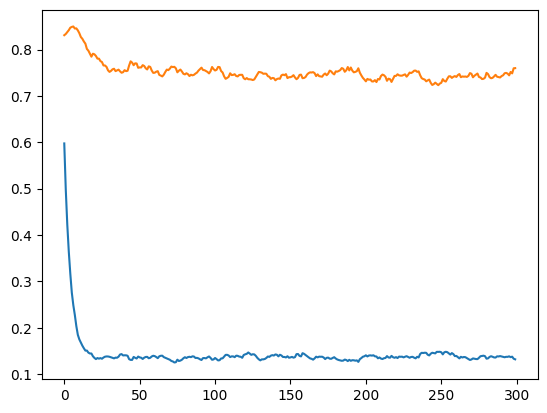

In [6]:
import matplotlib.pyplot as plt
plt.plot(overlaps[0, :])
plt.plot(correlations[0, :])